In [1]:
# check GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
# pulls repo to colab
!git clone https://github.com/char-tan/mode_connectivity.git

# checkout specific branch if needed
!cd mode_connectivity

Cloning into 'mode_connectivity'...
remote: Enumerating objects: 1514, done.
remote: Counting objects: 100% (801/801), done.
remote: Compressing objects: 100% (583/583), done.
remote: Total 1514 (delta 277), reused 678 (delta 217), pack-reused 713
Receiving objects: 100% (1514/1514), 38.82 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (680/680), done.
https://git-lfs.github.com/spec/v1 is not a valid attribute name: experiments/.gitattributes:1
sha256:6cad82a54d893ad91b3b9f7bd66b710f2f4c2e109951f8e9e3605bba782a4f52 is not a valid attribute name: experiments/.gitattributes:2


In [3]:
# allows you to change the .py files and have the imports updated
%load_ext autoreload
%autoreload 2

In [4]:

import sys, os
SCRIPT_DIR = os.path.dirname(os.path.abspath('.'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

sys.path.append("mode_connectivity")

In [5]:

from mode_connectivity.experiments import mlp_config, resnet_config, run_experiment
from mode_connectivity.utils.metrics import index_distance, euclid_dist, sqrt_JSD_loss

import torch
from google.colab import files
     

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
# may need to manually upload these files onto your colab directory because of some issues with git lfs

permuted_losses = torch.load('mlp_mnist_permuted_50_epochs_path_action.pt')
permuted_sq_euc_dists = torch.load('mlp_mnist_permuted_50_epochs_sq_euc_dists.pt')

unpermuted_losses = torch.load('mlp_mnist_unpermuted_50_epochs_path_action.pt')
unpermuted_sq_euc_dists = torch.load('mlp_mnist_unpermuted_50_epochs_sq_euc_dists.pt')


In [10]:
from mode_connectivity.experiments import opt_plot

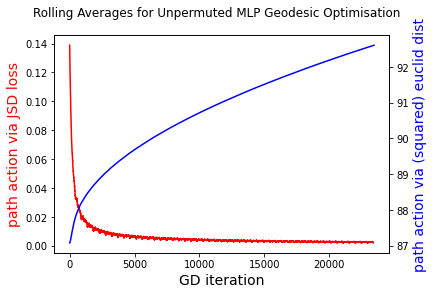

In [14]:
fig, ax = opt_plot(unpermuted_losses, unpermuted_sq_euc_dists)
fig.suptitle("Rolling Averages for Unpermuted MLP Geodesic Optimisation")
fig.show()

In [15]:
fig.savefig('gdopt_mlp_unpermuted.png')

In [16]:
comparison_dict_permuted = torch.load('mlp_mnist_permuted_50_epochs_comparison_dict.pt')
comparison_dict_unpermuted = torch.load('mlp_mnist_unpermuted_50_epochs_comparison_dict.pt')

In [17]:
from mode_connectivity.geodesic_opt import plot_lmc_geodesic_comparison_obj

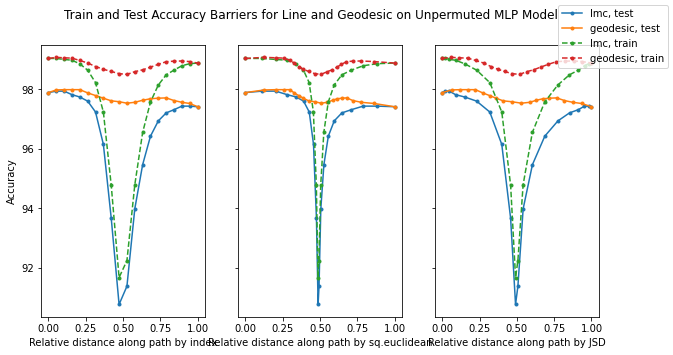

In [27]:
fig, ax = plot_lmc_geodesic_comparison_obj(comparison_dict_unpermuted, figsize =(10,5), relative_x = True)
fig.suptitle('Train and Test Accuracy Barriers for Line and Geodesic on Unpermuted MLP Model')
fig.show()

In [28]:
fig.savefig('mlp_unpermuted_loss_barrier.png')